In [64]:
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/Brats19/HGG')

Mounted at /content/drive


In [65]:
import glob

import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as color
!pip install SimpleITK
import SimpleITK as sitk 
from tqdm import tqdm
import numpy as np

In [0]:
def load_data(src, mask):
    files = sorted(glob.glob(src + mask, recursive=True))
   
    imgs = []
    print('Processing---', mask)
    for file in tqdm(files[5:6:1]):#number of data you want to load
        img = io.imread(file, plugin='simpleitk')
        

    return img

In [91]:
data = []
my_dir = sorted(os.listdir('./'))
for p in tqdm(my_dir[0:1:1]):
    data_list = sorted(os.listdir('./'+p))
    Flair = load_data('./', '**/*flair.nii.gz')
    T1 = load_data('./', '**/*t1.nii.gz')
    T1ce = load_data('./', '**/*t1ce.nii.gz')
    t2 = load_data('./', '**/*t2.nii.gz')
    #for i in  tqdm(my_dir[0:1:1]):

    data =  Flair + T1 + T1ce + t2
#data = data.append(data)
      
data = np.asarray(data,dtype=np.float32)
#np.save('Fused.npy',data) #saving fused data 

  0%|          | 0/1 [00:00<?, ?it/s]

Processing--- **/*flair.nii.gz



100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Processing--- **/*t1.nii.gz



100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Processing--- **/*t1ce.nii.gz



100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Processing--- **/*t2.nii.gz



100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


In [93]:
data.shape,Flair.shape

((155, 240, 240), (155, 240, 240))

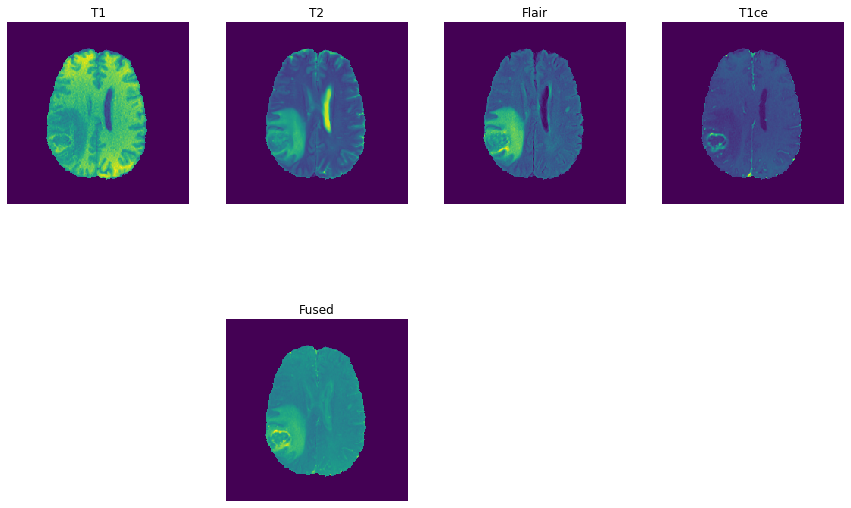

In [96]:
plt.figure(figsize=(15,10))

plt.subplot(241)
plt.title('T1')
plt.axis('off')
plt.imshow(T1[90, :, :])

plt.subplot(242)
plt.title('T2')
plt.axis('off')
plt.imshow(t2[90,:, :])
    
plt.subplot(243)
plt.title('Flair')
plt.axis('off')
plt.imshow(Flair[90, :, :])

plt.subplot(244)
plt.title('T1ce')
plt.axis('off')
plt.imshow(T1ce[90, :, :])

plt.subplot(246)
plt.title('Fused')
plt.axis('off')
plt.imshow(data[90, :, :])
